In [1]:
import sys
sys.path.append("/Users/rq.aita/Scripts")
sys.path.append("/home/ufpr/Documentos/GitHub/scripts")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrology as hydro
import settings_plot

# Exercício 1

Na tabela a seguir, são apresentados os registros dos totais anuais de precipitação em duas estações próximas, X e Y, no período 1943-76. Deseja-se utilizar esses dados para efetuar o balanço hídrico em nível anual na região em que estão localizadas as estações. Solicita-se efetuar o preenchimento de todos os valores não disponíveis no período mediante regressão linear (exercício extraído de Tucci, 1997).

| Ano  | X (mm) | Y (mm) | Ano  | X (mm) | Y (mm) |
|------|--------|--------|------|--------|--------|
| 1943 |        | 1497   | 1960 | 1656   |        |
| 1944 |        | 1243   | 1961 | 2167   | 1678   |
| 1945 |        | 1359   | 1962 |        | 2048   |
| 1946 | 1505   | 1493   | 1963 | 1981   | 1771   |
| 1947 | 1634   | 1559   | 1964 | 1551   | 1191   |
| 1948 | 1775   | 1671   | 1965 | 1781   | 1572   |
| 1949 | 1421   | 1533   | 1966 | 1965   | 1666   |
| 1950 | 1619   |        | 1967 | 1342   | 1012   |
| 1951 | 1304   | 1214   | 1968 | 841    | 1064   |
| 1952 | 1640   | 1384   | 1969 | 1205   | 1349   |
| 1953 | 1569   |        | 1970 | 1287   | 1541   |
| 1954 | 2209   | 2158   | 1971 | 1509   | 1539   |
| 1955 | 1393   | 1371   | 1972 | 1664   |        |
| 1956 |        | 2035   | 1973 | 2021   |        |
| 1957 | 2090   | 2229   | 1974 | 1906   |        |
| 1958 | 2311   | 2189   | 1975 | 1776   |        |
| 1959 | 1638   | 1553   | 1976 | 1925   |        |

# Resolução

### Entrada

In [2]:
e_01_data = pd.read_excel("files/l_02_01.xlsx", index_col="Ano")

# Período em comum das estações
e_01_data_comum = e_01_data[~e_01_data.isnull().any(axis=1)]

# Anos com falha em X ou Y
e_01_falha_y = e_01_data["X (mm)"][e_01_data["Y (mm)"].isnull()]
e_01_falha_x = e_01_data["Y (mm)"][e_01_data["X (mm)"].isnull()]

### Ajuste para preenchimento de Y

Regressão na forma $Y = a X + b$, com $a$ e $b$ estimados pelo método dos mínimos quadrados

In [3]:
e_01_x = e_01_data_comum["X (mm)"].to_numpy()
e_01_y = e_01_data_comum["Y (mm)"].to_numpy()

e_01_ay, e_01_by, _ = hydro.reg_linear(e_01_x, e_01_y)

R2 = 0.724
Ajuste obtido: Y = 0.752 X +  321.852


In [4]:
e_01_prev_y = e_01_ay * e_01_falha_y + e_01_by
e_01_prev_y = e_01_prev_y.rename("Y (mm)")
e_01_falha_y = pd.DataFrame(e_01_falha_y)
e_01_falha_y["Y (mm)"] = e_01_prev_y
e_01_falha_y.round()

,X (mm),Y (mm)
Ano,,
1950,1619.0,1539.0
1953,1569.0,1502.0
1960,1656.0,1567.0
1972,1664.0,1573.0
1973,2021.0,1841.0
1974,1906.0,1755.0
1975,1776.0,1657.0
1976,1925.0,1769.0


### Ajuste para preenchimento de X

Regressão na forma $X = a Y + b$, com $a$ e $b$ estimados pelo método dos mínimos quadrados

In [5]:
e_01_ax, e_01_bx, _ = hydro.reg_linear(e_01_y, e_01_x)

R2 = 0.724
Ajuste obtido: Y = 0.963 X +  144.361


In [6]:
e_01_prev_x = e_01_ax * e_01_falha_x + e_01_bx
e_01_prev_x = e_01_prev_x.rename("X (mm)")
e_01_falha_x = pd.DataFrame(e_01_falha_x)
e_01_falha_x["X (mm)"] = e_01_prev_x
e_01_falha_x.round()

,Y (mm),X (mm)
Ano,,
1943,1497.0,1586.0
1944,1243.0,1341.0
1945,1359.0,1453.0
1956,2035.0,2104.0
1962,2048.0,2116.0


### Gráfico

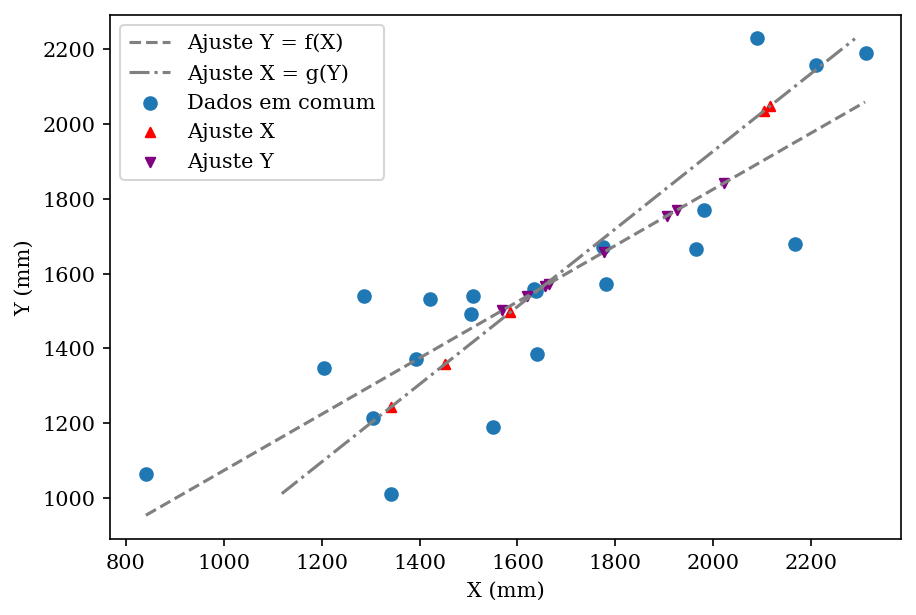

In [7]:
xx = np.arange(e_01_data.min()["X (mm)"], e_01_data.max()["X (mm)"])
yx = e_01_ay * xx + e_01_by

yy = np.arange(e_01_data.min()["Y (mm)"], e_01_data.max()["Y (mm)"])
xy = e_01_ax * yy + e_01_bx

fig, ax = plt.subplots(constrained_layout=True)

# Medições
ax.scatter(e_01_x, e_01_y, label="Dados em comum")

# Ajuste
ax.plot(xx, yx, label="Ajuste Y = f(X)", color="gray", linestyle="--")
ax.plot(xy, yy, label="Ajuste X = g(Y)", color="gray", linestyle="-.")

# Preenchimentos
e_01_falha_x.plot.scatter(
    x='X (mm)', y='Y (mm)', ax=ax, label="Ajuste X", color="red", marker="^",
)
e_01_falha_y.plot.scatter(
    x='X (mm)', y='Y (mm)', ax=ax, label="Ajuste Y", color="purple", marker="v"
)

ax.legend()
fig.savefig("figures/l_02_01.png", format="png", dpi=300)
plt.show()

In [8]:
del xx, yx, xy, yy

In [9]:
whos

Variable          Type           Data/Info
------------------------------------------
ax                AxesSubplot    AxesSubplot(0.113519,0.115279;0.879536x0.874304)
e_01_ax           float64        0.9627461003357186
e_01_ay           float64        0.751920775992454
e_01_bx           float64        144.3609958718846
e_01_by           float64        321.8518623922241
e_01_data         DataFrame            X (mm)  Y (mm)\nAno<...>NaN\n1976  1925.0     NaN
e_01_data_comum   DataFrame            X (mm)  Y (mm)\nAno<...>1.0\n1971  1509.0  1539.0
e_01_falha_x      DataFrame            Y (mm)       X (mm)<...>1962  2048.0  2116.065009
e_01_falha_y      DataFrame            X (mm)       Y (mm)<...>1976  1925.0  1769.299356
e_01_prev_x       Series         Ano\n1943    1585.591908\<...>e: X (mm), dtype: float64
e_01_prev_y       Series         Ano\n1950    1539.211599\<...>e: Y (mm), dtype: float64
e_01_x            ndarray        21: 21 elems, type `float64`, 168 bytes
e_01_y            nd

# Exercício 2

A equação indicada a seguir, descreve as relações i-d-f de chuvas em um certo local. Utilizando o método do Bureau of Reclamation, determine os hietogramas de projeto para um sistema de esgotos pluviais da região próxima do local, para duas bacias com tempos de concentração iguais a 40 e 90 minutos, respectivamente. Utilizar tempo de recorrência de 10 anos.

$$i = \dfrac{1200 T^{0,12}}{(t + 20)^{0,70}}$$

onde $t$ em minutos, $T$ em anos e $i$ em mm/h (exercício adaptado de Tucci, 1997).

Adotado: incrementos de 10 minutos

# Exercício 3

Dada uma bacia hidrográfica de forma circular com 314,16 km2 de área, determinar a chuva média de um episódio pluvial pelo método das isoietas, sabendo que o total precipitado na posição central da bacia foi de 100 mm, o mapa das isoietas é formado por círculos concêntricos de 2, 4, 6, 8 e 10 km de raio, correspondentes, respectivamente, a 80, 60, 40, 20 e 0 mm (exercício extraído de Úmbria e Zandonai, 1996).

$$
    \bar P = \dfrac{1}{A} \left( \sum A_{i, i+1} \dfrac{P_i + P_{i+1}}{2} \right) = 0.4 \left[ \sum_{i=0}^{4} (2i + 1)(10 - 2i - 1) \right]
$$

In [12]:
e_03_p = 0.4 * sum(
    (2*i + 1) * (10 - 2*i - 1) for i in range(5)
)
e_03_p

34.0

# Exercício 4

Na verdade, a figura geométrica que produziu as isoietas do exercício anterior seria representada por uma série de cilindros concêntricos. Assim sendo, pode-se resolver o problema, imaginando-se que as isoietas são de milímetro em milímetro e não de 10 mm em 10 mm. Pode-se resolver, mais uma vez, com diferenças ainda menores entre as isoietas. No limite, qual o valor exato da precipitação média? (Supor que a variação da precipitação é linear) (exercício extraído de Úmbria e Zandonai, 1996).

# Exercício 5

Calcule novamente a evapotranspiração potencial mensal e anual do exercício resolvido na aula  09, utilizando as equações de Serra, dadas a seguir, para a avaliação dos parâmetros $I$ e $a$ do método de Thornthwaite.
$$
    I = \sum_{i=1}^{12} \left( 0,09 t_i^{\frac{3}{2}} \right) \ \ \ e \ \ \ a = 0,016I + 0,5
$$
Comparar os resultados obtidos em sala e os obtidos por você na solução do exercício. Procure explicar as diferenças encontradas (exercício adaptado de Úmbria e Zandonai, 1996). 

| Mês       | T(°C) | N(h) | Mês      | T(°C) | N(h) |
|-----------|-------|------|----------|-------|------|
| Janeiro   | 23,9  | 13,3 | Julho    | 16,9  | 10,9 |
| Fevereiro | 23,5  | 12,7 | Agosto   | 18,5  | 11,4 |
| Março     | 22,4  | 11,6 | Setembro | 20,3  | 12,0 |
| Abril     | 20,8  | 11,6 | Outubro  | 20,8  | 12,7 |
| Maio      | 17,0  | 11,0 | Novembro | 23,1  | 13,2 |
| Junho     | 16,0  | 10,7 | Dezembro | 23,0  | 13,6 |

## Resolução

### Entradas

In [10]:
e_05_T = np.array([
    23.9, 23.5, 22.4, 20.8, 17. , 16. , 16.9, 18.5, 20.3, 20.8, 23.1, 23. ,
])
e_05_N = np.array([
    13.3, 12.7, 11.6, 11.6, 11. , 10.7, 10.9, 11.4, 12. , 12.7, 13.2, 13.6,
])

### Método de Thornthwaite

In [11]:
e_05_EVTp, e_05_I, e_05_a = hydro.thornthwaite(e_05_T, e_05_N, serra=True)

In [12]:
e_05_data = {
    "T (°C)" : e_05_T,
    "N (h)" : e_05_N,
    "EVTp (mm)" : e_05_EVTp.round(1),
}
e_05_data = pd.DataFrame(
    data=e_05_data, index=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
                           "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
)

In [13]:
print(e_05_data)
print("a =", e_05_a.round(2))
print("I =", e_05_I.round(2))

     T (°C)  N (h)  EVTp (mm)
Jan    23.9   13.3      114.8
Fev    23.5   12.7       95.5
Mar    22.4   11.6       87.3
Abr    20.8   11.6       72.2
Mai    17.0   11.0       46.2
Jun    16.0   10.7       38.2
Jul    16.9   10.9       45.2
Ago    18.5   11.4       57.2
Set    20.3   12.0       70.9
Out    20.8   12.7       81.7
Nov    23.1   13.2      102.6
Dez    23.0   13.6      108.2
a = 2.12
I = 101.02


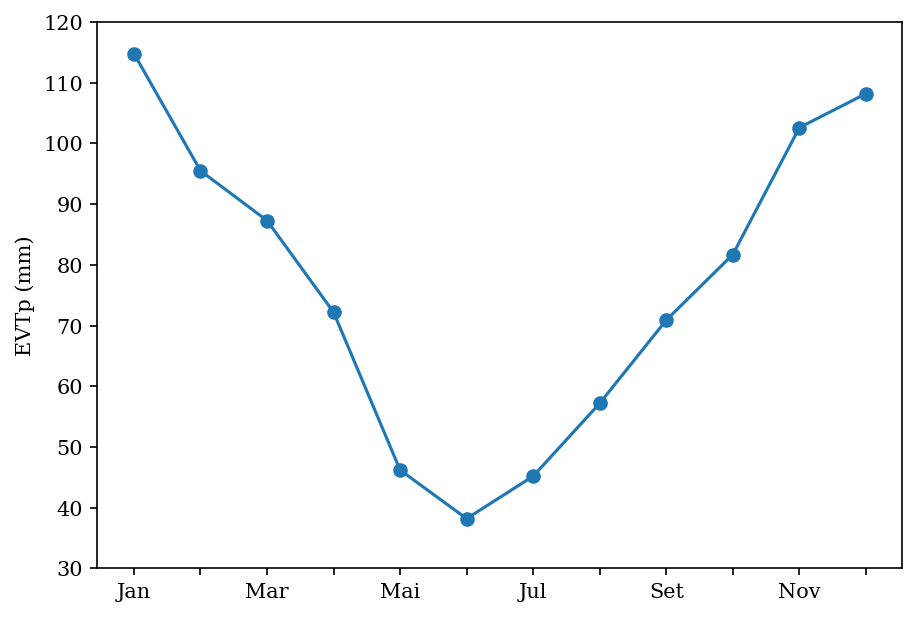

In [30]:
fig, ax = plt.subplots(constrained_layout=True)
e_05_data["EVTp (mm)"].plot(marker="o", ax=ax)
ax.set_xticks(range(0,12))
ax.set_ylabel("EVTp (mm)")
ax.set_ylim([30, 120])
plt.show()

# Exercício 6

Refaça o exemplo da aula 09 (método de Thornthwaite), substituindo a temperatura média mensal em cada mês pela temperatura média anual. Compare os resultados btidos com o exemplo resolvido na referida aula, relativamente às evapotranspirações médias mensais e a evapotranspiração média anual. 

## Resolução

### Entradas

In [ ]:
e_06_T = np.array([
    23.9, 23.5, 22.4, 20.8, 17. , 16. , 16.9, 18.5, 20.3, 20.8, 23.1, 23. ,
])
e_06_T = e_06_T.mean() * np.ones(12)

e_06_N = np.array([
    13.3, 12.7, 11.6, 11.6, 11. , 10.7, 10.9, 11.4, 12. , 12.7, 13.2, 13.6,
])

### Método de Thornthwaite

In [ ]:
e_06_EVTp, e_06_I, e_06_a = hydro.thornthwaite(e_06_T, e_06_N)

In [ ]:
e_06_data = {
    "T (°C)" : e_06_T.round(1),
    "N (h)" : e_06_N,
    "EVTp (mm)" : e_06_EVTp.round(1),
}
e_06_data = pd.DataFrame(
    data=e_06_data, index=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
                           "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
)

In [ ]:
e_06_data

In [ ]:
print("a =", e_06_a.round(2))
print("I =", e_06_I.round(2))